In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt



In [8]:
my_peaks_bed_merged_filename = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/cocl2.merge.from_fixed_peaks_400bp.sorted.merged.filtered.bare.bed'

In [43]:
# my_peaks_bed_merged_filename = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/peak_calls_finCell/merged.peaks_from_cellsubtypes.bed'
cellpeakbed_dir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/'
cellpeakbed_suffix = '.fixed_peaks.bared.bed'
celltypes = ['CoCl2__acinar' , 
'CoCl2__activated_stellate' , 
'CoCl2__alpha_1' , 
'CoCl2__alpha_2' , 
'CoCl2__alpha_3' , 
'CoCl2__alpha_4' , 
'CoCl2__alpha' , 
'CoCl2__beta_1' , 
'CoCl2__beta_2' , 
'CoCl2__beta' , 
'CoCl2__delta' , 
'CoCl2__ductal' , 
'CoCl2__endothelial' , 
'CoCl2__gamma' , 
'CoCl2__immune' , 
'CoCl2__mast' , 
'CoCl2__monocyte' , 
'CoCl2__quiescent_stellate_1' , 
'CoCl2__schwann' , 
'CoCl2__stellate' , 
'CoCl2__unk_stellate' , 
'Unt__acinar' , 
'Unt__activated_stellate' , 
'Unt__alpha_1' , 
'Unt__alpha_2' , 
'Unt__alpha_3' , 
'Unt__alpha_4' , 
'Unt__alpha' , 
'Unt__beta_1' , 
'Unt__beta_2' , 
'Unt__beta' , 
'Unt__delta' , 
'Unt__ductal' , 
'Unt__endothelial' , 
'Unt__gamma' , 
'Unt__immune' , 
'Unt__mast' , 
'Unt__monocyte' , 
'Unt__quiescent_stellate_1' , 
'Unt__schwann' , 
'Unt__stellate' , 
'Unt__unk_stellate']
rebecca_peaks_bed_filename = '/nfs/lab/projects/nPOD/downstream_files/ATAC/final_peakcall/peakCallOutput_qvalue05_UNparallelized_20230118/mergedPeak.txt'






In [29]:
def getListOfPeakLengths (filename1):
    file = open(filename1)

    lengthsDict = dict()

    for line in file:
        line = line.strip()
        if len(line) > 0:
            s = line.split()
            chrom = s[0]
            start = s[1]
            end = s[2]
            peak = chrom + ':' + start + '-' + end
            start = int(start)
            end = int(end)
            length1 = end - start
            lengthsDict[peak] = length1
    file.close()
    return lengthsDict

def dictToList (dict1):
    list1 = list()
    i = 0
    for key in dict1.keys():
        list1.append(dict1[key])
        i = i + 1
    return list1

def getMetrics (list1):
    metricsDict = dict()
    metricsDict['avg'] = np.average(list1)
    metricsDict['mean'] = np.mean(list1)
    metricsDict['median'] = np.median(list1)
    metricsDict['stdev'] = np.std(list1)
    metricsDict['max'] = max(list1)
    metricsDict['min'] = min(list1)
    metricsDict['n'] = len(list1)
    return metricsDict








    

In [44]:
cell_peaks_dict = dict()

print('my_merged')
cell_peaks_dict['my_merged'] = getListOfPeakLengths (my_peaks_bed_merged_filename)
print('rebecca_merged')
cell_peaks_dict['rebecca_merged'] = getListOfPeakLengths (rebecca_peaks_bed_filename)

for cell in celltypes:
    print(cell)
    filename2 = cellpeakbed_dir + cell + cellpeakbed_suffix
    print(filename2)
    cell_peaks_dict[cell] = getListOfPeakLengths (filename2)

my_merged
rebecca_merged
CoCl2__acinar
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/CoCl2__acinar.fixed_peaks.bared.bed
CoCl2__activated_stellate
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/CoCl2__activated_stellate.fixed_peaks.bared.bed
CoCl2__alpha_1
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/CoCl2__alpha_1.fixed_peaks.bared.bed
CoCl2__alpha_2
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/CoCl2__alpha_2.fixed_peaks.bared.bed
CoCl2__alpha_3
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2_summitsBed/merged/v2_merge_fixed_peaks/CoCl2__alpha_3.fixed_peaks.bared.bed
CoCl2__alpha_4
/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/from_peaks_to_mm_mtx_v2

In [45]:
cell_peaks_list_dict = dict()
cell_peaks_metrics_dict = dict()


print('my_merged list')
cell_peaks_list_dict['my_merged'] = dictToList (cell_peaks_dict['my_merged'])
print('my_merged metrics')
cell_peaks_metrics_dict['my_merged'] = getMetrics (cell_peaks_list_dict['my_merged'])

print('rebecca_merged list')
cell_peaks_list_dict['rebecca_merged'] = dictToList (cell_peaks_dict['rebecca_merged'])
print('rebecca_merged metrics')
cell_peaks_metrics_dict['rebecca_merged'] = getMetrics (cell_peaks_list_dict['rebecca_merged'])



for cell in celltypes:
    print(cell, ' list')
    cell_peaks_list_dict[cell] = dictToList (cell_peaks_dict[cell])
    print(cell, ' metrics')
    cell_peaks_metrics_dict[cell] = getMetrics (cell_peaks_list_dict[cell])




my_merged list
my_merged metrics
rebecca_merged list
rebecca_merged metrics
CoCl2__acinar  list
CoCl2__acinar  metrics
CoCl2__activated_stellate  list
CoCl2__activated_stellate  metrics
CoCl2__alpha_1  list
CoCl2__alpha_1  metrics
CoCl2__alpha_2  list
CoCl2__alpha_2  metrics
CoCl2__alpha_3  list
CoCl2__alpha_3  metrics
CoCl2__alpha_4  list
CoCl2__alpha_4  metrics
CoCl2__alpha  list
CoCl2__alpha  metrics
CoCl2__beta_1  list
CoCl2__beta_1  metrics
CoCl2__beta_2  list
CoCl2__beta_2  metrics
CoCl2__beta  list
CoCl2__beta  metrics
CoCl2__delta  list
CoCl2__delta  metrics
CoCl2__ductal  list
CoCl2__ductal  metrics
CoCl2__endothelial  list
CoCl2__endothelial  metrics
CoCl2__gamma  list
CoCl2__gamma  metrics
CoCl2__immune  list
CoCl2__immune  metrics
CoCl2__mast  list
CoCl2__mast  metrics
CoCl2__monocyte  list
CoCl2__monocyte  metrics
CoCl2__quiescent_stellate_1  list
CoCl2__quiescent_stellate_1  metrics
CoCl2__schwann  list
CoCl2__schwann  metrics
CoCl2__stellate  list
CoCl2__stellate  metric

In [46]:
cell_peaks_metrics_dict

{'my_merged': {'avg': 508.21259119863396,
  'mean': 508.21259119863396,
  'median': 425.0,
  'stdev': 179.04167462673152,
  'max': 2962,
  'min': 400,
  'n': 367193},
 'rebecca_merged': {'avg': 586.46551555787,
  'mean': 586.46551555787,
  'median': 480.0,
  'stdev': 381.95170667188034,
  'max': 5093,
  'min': 200,
  'n': 368688},
 'CoCl2__acinar': {'avg': 400.0,
  'mean': 400.0,
  'median': 400.0,
  'stdev': 0.0,
  'max': 400,
  'min': 400,
  'n': 45805},
 'CoCl2__activated_stellate': {'avg': 399.9995662322104,
  'mean': 399.9995662322104,
  'median': 400.0,
  'stdev': 0.09100940098027349,
  'max': 400,
  'min': 380,
  'n': 48413},
 'CoCl2__alpha_1': {'avg': 399.9998516833935,
  'mean': 399.9998516833935,
  'median': 400.0,
  'stdev': 0.053217656065311765,
  'max': 400,
  'min': 380,
  'n': 141589},
 'CoCl2__alpha_2': {'avg': 399.9997598929809,
  'mean': 399.9997598929809,
  'median': 400.0,
  'stdev': 0.06771146909657517,
  'max': 400,
  'min': 380,
  'n': 87461},
 'CoCl2__alpha_3': 

In [47]:
metrics_df = pd.DataFrame(columns = ['avg', 'mean', 'median', 'stdev', 'max',  'min', 'n'])



keylist = list()

for key in cell_peaks_metrics_dict.keys():
    keylist.append(key)

    dfAdd = pd.DataFrame.from_dict(cell_peaks_metrics_dict[key], orient='index').T
    dfAdd.index = [key]
    # dfAdd = dfAdd.drop(columns=['index'])
    metrics_df = pd.concat([metrics_df, dfAdd], ignore_index=True  )

In [48]:
metrics_df.index = keylist

In [49]:
metrics_df

,avg,mean,median,stdev,max,min,n
my_merged,508.212591,508.212591,425.0,179.041675,2962.0,400.0,367193.0
rebecca_merged,586.465516,586.465516,480.0,381.951707,5093.0,200.0,368688.0
CoCl2__acinar,400.000000,400.000000,400.0,0.000000,400.0,400.0,45805.0
CoCl2__activated_stellate,399.999566,399.999566,400.0,0.091009,400.0,380.0,48413.0
CoCl2__alpha_1,399.999852,399.999852,400.0,0.053218,400.0,380.0,141589.0
CoCl2__alpha_2,399.999760,399.999760,400.0,0.067711,400.0,380.0,87461.0
CoCl2__alpha_3,399.999692,399.999692,400.0,0.076699,400.0,380.0,68165.0
CoCl2__alpha_4,399.999584,399.999584,400.0,0.089113,400.0,380.0,50496.0
CoCl2__alpha,399.999859,399.999859,400.0,0.051887,400.0,380.0,148944.0
CoCl2__beta_1,399.999854,399.999854,400.0,0.052857,400.0,380.0,143529.0


In [50]:
treatmentDict = {'my_merged' : 'merged',
 'rebecca_merged' : 'merged',
 'CoCl2__acinar' : 'CoCl2',
 'CoCl2__activated_stellate' : 'CoCl2',
 'CoCl2__alpha_1' : 'CoCl2',
 'CoCl2__alpha_2' : 'CoCl2',
 'CoCl2__alpha_3' : 'CoCl2',
 'CoCl2__alpha_4' : 'CoCl2',
 'CoCl2__alpha' : 'CoCl2',
 'CoCl2__beta_1' : 'CoCl2',
 'CoCl2__beta_2' : 'CoCl2',
 'CoCl2__beta' : 'CoCl2',
 'CoCl2__delta' : 'CoCl2',
 'CoCl2__ductal' : 'CoCl2',
 'CoCl2__endothelial' : 'CoCl2',
 'CoCl2__gamma' : 'CoCl2',
 'CoCl2__immune' : 'CoCl2',
 'CoCl2__mast' : 'CoCl2',
 'CoCl2__monocyte' : 'CoCl2',
 'CoCl2__quiescent_stellate_1' : 'CoCl2',
 'CoCl2__schwann' : 'CoCl2',
 'CoCl2__stellate' : 'CoCl2',
 'CoCl2__unk_stellate' : 'CoCl2',
 'Unt__acinar' : 'Unt',
 'Unt__activated_stellate' : 'Unt',
 'Unt__alpha_1' : 'Unt',
 'Unt__alpha_2' : 'Unt',
 'Unt__alpha_3' : 'Unt',
 'Unt__alpha_4' : 'Unt',
 'Unt__alpha' : 'Unt',
 'Unt__beta_1' : 'Unt',
 'Unt__beta_2' : 'Unt',
 'Unt__beta' : 'Unt',
 'Unt__delta' : 'Unt',
 'Unt__ductal' : 'Unt',
 'Unt__endothelial' : 'Unt',
 'Unt__gamma' : 'Unt',
 'Unt__immune' : 'Unt',
 'Unt__mast' : 'Unt',
 'Unt__monocyte' : 'Unt',
 'Unt__quiescent_stellate_1' : 'Unt',
 'Unt__schwann' : 'Unt',
 'Unt__stellate' : 'Unt',
 'Unt__unk_stellate' : 'Unt'}

celltype_dict = {
    'my_merged' : 'my_merged',
 'rebecca_merged' : 'rebecca_merged',
 'CoCl2__acinar' : 'acinar',
 'CoCl2__activated_stellate' : 'activated_stellate',
 'CoCl2__alpha_1' : 'alpha_1',
 'CoCl2__alpha_2' : 'alpha_2',
 'CoCl2__alpha_3' : 'alpha_3',
 'CoCl2__alpha_4' : 'alpha_4',
 'CoCl2__alpha' : 'alpha',
 'CoCl2__beta_1' : 'beta_1',
 'CoCl2__beta_2' : 'beta_2',
 'CoCl2__beta' : 'beta',
 'CoCl2__delta' : 'delta',
 'CoCl2__ductal' : 'ductal',
 'CoCl2__endothelial' : 'endothelial',
 'CoCl2__gamma' : 'gamma',
 'CoCl2__immune' : 'immune',
 'CoCl2__mast' : 'mast',
 'CoCl2__monocyte' : 'monocyte',
 'CoCl2__quiescent_stellate_1' : 'quiescent_stellate_1',
 'CoCl2__schwann' : 'schwann',
 'CoCl2__stellate' : 'stellate',
 'CoCl2__unk_stellate' : 'unk_stellate',
 'Unt__acinar' : 'acinar',
 'Unt__activated_stellate' : 'activated_stellate',
 'Unt__alpha_1' : 'alpha_1',
 'Unt__alpha_2' : 'alpha_2',
 'Unt__alpha_3' : 'alpha_3',
 'Unt__alpha_4' : 'alpha_4',
 'Unt__alpha' : 'alpha',
 'Unt__beta_1' : 'beta_1',
 'Unt__beta_2' : 'beta_2',
 'Unt__beta' : 'beta',
 'Unt__delta' : 'delta',
 'Unt__ductal' : 'ductal',
 'Unt__endothelial' : 'endothelial',
 'Unt__gamma' : 'gamma',
 'Unt__immune' : 'immune',
 'Unt__mast' : 'mast',
 'Unt__monocyte' : 'monocyte',
 'Unt__quiescent_stellate_1' : 'quiescent_stellate_1',
 'Unt__schwann' : 'schwann',
 'Unt__stellate' : 'stellate',
 'Unt__unk_stellate' : 'unk_stellate'}

treatmentcolordict = {
'merged' : 'orange',
'CoCl2' : 'magenta',
'Unt' : 'grey'
}

treatment_marker_map = {
'merged' : 's',
'CoCl2' : 'o',
'Unt' : 'x'
}


celltype_color_map = {
'my_merged' : 'grey',
'rebecca_merged' : 'silver',
'merged' : 'grey',
'acinar' : 'orange',
'activated_stellate' : 'darkgreen',
'alpha_1' : 'crimson',
'alpha_2' : 'firebrick',
'alpha_3' : 'maroon',
'alpha_4' : 'darkred',
'alpha' : 'red',
'beta_1' : 'navy',
'beta_2' : 'darkslateblue',
'beta' : 'blue',
'delta' : 'peru',
'ductal' : 'yellow',
'endothelial' : 'brown',
'gamma' : 'darkorange',
'immune' : 'darkorchid',
'mast' : 'plum',
'monocyte' : 'purple',
'quiescent_stellate_1' : 'lightgreen',
'schwann' : 'coral',
'stellate' : 'lime',
'unk_stellate' : 'darkseagreen'

}

metrics_df['Treatment'] = metrics_df.index.map(treatmentDict)
metrics_df['Celltype'] = metrics_df.index.map(celltype_dict)
# metrics_df['Treatment_Color'] = metrics_df['Treatment'].map(treatmentcolordict)

In [51]:
cellcount_map = {
'my_merged' :  14872,
'rebecca_merged' : 203346,
'CoCl2__acinar': 190,
'CoCl2__alpha': 5014,
'CoCl2__beta': 4376,
'CoCl2__delta': 786,
'CoCl2__ductal': 336,
'CoCl2__endothelial': 46,
'CoCl2__gamma': 262,
'CoCl2__immune': 52,
'CoCl2__schwann': 10,
'CoCl2__stellate': 156,
'Unt__acinar': 154,
'Unt__alpha': 1347,
'Unt__beta': 1296,
'Unt__delta': 169,
'Unt__ductal': 423,
'Unt__endothelial': 15,
'Unt__gamma': 78,
'Unt__immune': 18,
'Unt__schwann': 9,
'Unt__stellate': 135,
'CoCl2__activated_stellate': 78,
'CoCl2__alpha_1': 3839,
'CoCl2__alpha_2': 602,
'CoCl2__alpha_3': 419,
'CoCl2__alpha_4': 154,
'CoCl2__beta_1': 3458,
'CoCl2__beta_2': 918,
'CoCl2__mast': 23,
'CoCl2__monocyte': 29,
'CoCl2__quiescent_stellate_1': 47,
'CoCl2__unk_stellate': 31,
'Unt__activated_stellate': 67,
'Unt__alpha_1': 938,
'Unt__alpha_2': 207,
'Unt__alpha_3': 120,
'Unt__alpha_4': 82,
'Unt__beta_1': 910,
'Unt__beta_2': 386,
'Unt__mast': 9,
'Unt__monocyte': 9,
'Unt__quiescent_stellate_1': 35,
'Unt__unk_stellate' : 33,


}

metrics_df['cell_count'] = metrics_df.index.map(cellcount_map)

In [52]:
metrics_df[0:5]

,avg,mean,median,stdev,max,min,n,Treatment,Celltype,cell_count
my_merged,508.212591,508.212591,425.0,179.041675,2962.0,400.0,367193.0,merged,my_merged,14872
rebecca_merged,586.465516,586.465516,480.0,381.951707,5093.0,200.0,368688.0,merged,rebecca_merged,203346
CoCl2__acinar,400.000000,400.000000,400.0,0.000000,400.0,400.0,45805.0,CoCl2,acinar,190
CoCl2__activated_stellate,399.999566,399.999566,400.0,0.091009,400.0,380.0,48413.0,CoCl2,activated_stellate,78
CoCl2__alpha_1,399.999852,399.999852,400.0,0.053218,400.0,380.0,141589.0,CoCl2,alpha_1,3839


In [53]:
metrics_df['Celltype'].unique()

array(['my_merged', 'rebecca_merged', 'acinar', 'activated_stellate',
       'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha', 'beta_1',
       'beta_2', 'beta', 'delta', 'ductal', 'endothelial', 'gamma',
       'immune', 'mast', 'monocyte', 'quiescent_stellate_1', 'schwann',
       'stellate', 'unk_stellate'], dtype=object)

In [54]:
keylist

['my_merged',
 'rebecca_merged',
 'CoCl2__acinar',
 'CoCl2__activated_stellate',
 'CoCl2__alpha_1',
 'CoCl2__alpha_2',
 'CoCl2__alpha_3',
 'CoCl2__alpha_4',
 'CoCl2__alpha',
 'CoCl2__beta_1',
 'CoCl2__beta_2',
 'CoCl2__beta',
 'CoCl2__delta',
 'CoCl2__ductal',
 'CoCl2__endothelial',
 'CoCl2__gamma',
 'CoCl2__immune',
 'CoCl2__mast',
 'CoCl2__monocyte',
 'CoCl2__quiescent_stellate_1',
 'CoCl2__schwann',
 'CoCl2__stellate',
 'CoCl2__unk_stellate',
 'Unt__acinar',
 'Unt__activated_stellate',
 'Unt__alpha_1',
 'Unt__alpha_2',
 'Unt__alpha_3',
 'Unt__alpha_4',
 'Unt__alpha',
 'Unt__beta_1',
 'Unt__beta_2',
 'Unt__beta',
 'Unt__delta',
 'Unt__ductal',
 'Unt__endothelial',
 'Unt__gamma',
 'Unt__immune',
 'Unt__mast',
 'Unt__monocyte',
 'Unt__quiescent_stellate_1',
 'Unt__schwann',
 'Unt__stellate',
 'Unt__unk_stellate']

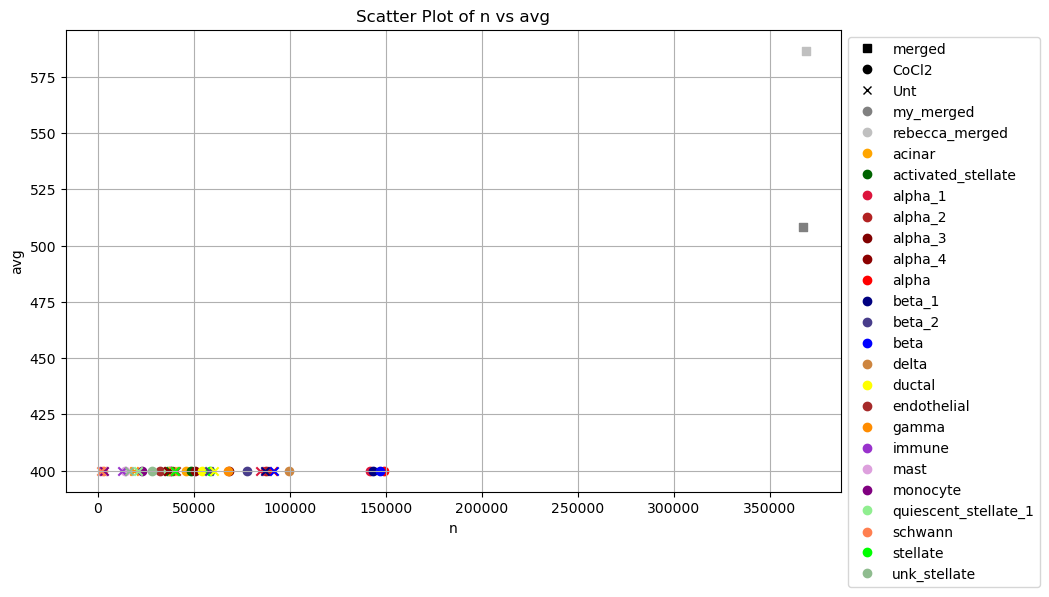

In [55]:

# Define custom marker styles for each treatment
marker_map = treatment_marker_map

# Define a custom color map for cell types
color_map =celltype_color_map

# Extract data from the DataFrame
x = metrics_df['n']
y = metrics_df['avg']
treatments = metrics_df['Treatment'].unique()
celltypes = metrics_df['Celltype'].unique()

# Create a scatter plot for each treatment and cell type combination
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for treatment in treatments:
    for celltype in celltypes:
        mask = (metrics_df['Treatment'] == treatment) & (metrics_df['Celltype'] == celltype)
        marker = marker_map.get(treatment, 'o')
        color = color_map.get(celltype, 'black')
        plt.scatter(x[mask], y[mask], marker=marker, color=color, label=f'{treatment} - {celltype}')

# Customize the plot
plt.title('Scatter Plot of n vs avg')
plt.xlabel('n')
plt.ylabel('avg')
plt.grid(True)

# Create combined legend for treatment and cell type
legend_handles = []
for treatment in treatments:
    marker = plt.Line2D([0], [0], marker=marker_map[treatment], linestyle='None', color='black', label=treatment)
    legend_handles.append(marker)
for celltype in celltypes:
    marker = plt.Line2D([0], [0], marker='o', linestyle='None', color=color_map[celltype], label=celltype)
    legend_handles.append(marker)

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

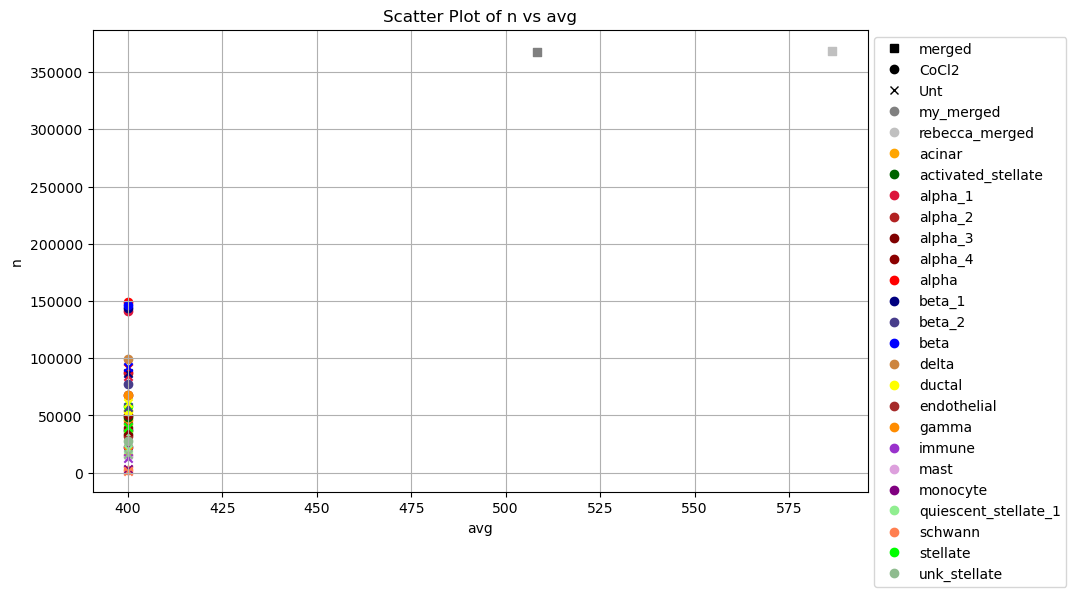

In [56]:

# Define custom marker styles for each treatment
marker_map = treatment_marker_map

# Define a custom color map for cell types
color_map =celltype_color_map

# Extract data from the DataFrame
x =  metrics_df['avg']
y = metrics_df['n']
treatments = metrics_df['Treatment'].unique()
celltypes = metrics_df['Celltype'].unique()

# Create a scatter plot for each treatment and cell type combination
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for treatment in treatments:
    for celltype in celltypes:
        mask = (metrics_df['Treatment'] == treatment) & (metrics_df['Celltype'] == celltype)
        marker = marker_map.get(treatment, 'o')
        color = color_map.get(celltype, 'black')
        plt.scatter(x[mask], y[mask], marker=marker, color=color, label=f'{treatment} - {celltype}')

# Customize the plot
plt.title('Scatter Plot of n vs avg')
plt.xlabel('avg')
plt.ylabel('n')
plt.grid(True)

# Create combined legend for treatment and cell type
legend_handles = []
for treatment in treatments:
    marker = plt.Line2D([0], [0], marker=marker_map[treatment], linestyle='None', color='black', label=treatment)
    legend_handles.append(marker)
for celltype in celltypes:
    marker = plt.Line2D([0], [0], marker='o', linestyle='None', color=color_map[celltype], label=celltype)
    legend_handles.append(marker)

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

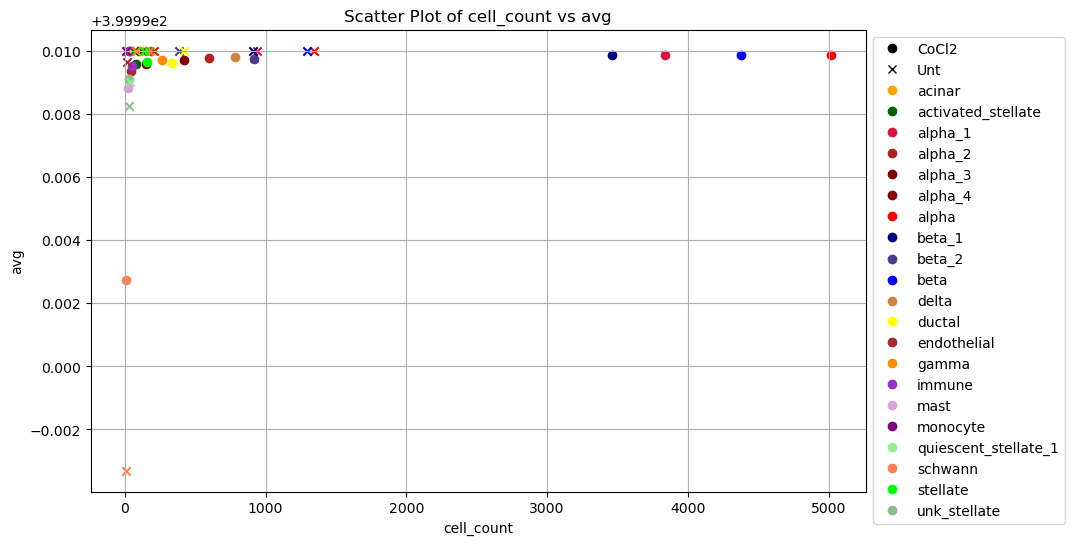

In [57]:
# Create a boolean mask based on the condition
mask = metrics_df['Celltype'] != 'rebecca_merged'

# Apply the mask to the DataFrame
metrics_df_sub = metrics_df[mask]

mask = metrics_df_sub['Celltype'] != 'my_merged'

# Apply the mask to the DataFrame
metrics_df_sub = metrics_df_sub[mask]



# Define custom marker styles for each treatment
marker_map = treatment_marker_map

# Define a custom color map for cell types
color_map =celltype_color_map

# Extract data from the DataFrame
x =  metrics_df_sub['cell_count']
y = metrics_df_sub['avg']
treatments = metrics_df_sub['Treatment'].unique()
celltypes = metrics_df_sub['Celltype'].unique()

# Create a scatter plot for each treatment and cell type combination
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for treatment in treatments:
    for celltype in celltypes:
        mask = (metrics_df_sub['Treatment'] == treatment) & (metrics_df_sub['Celltype'] == celltype)
        marker = marker_map.get(treatment, 'o')
        color = color_map.get(celltype, 'black')
        plt.scatter(x[mask], y[mask], marker=marker, color=color, label=f'{treatment} - {celltype}')

# Customize the plot
plt.title('Scatter Plot of cell_count vs avg')
plt.xlabel('cell_count')
plt.ylabel('avg')
plt.grid(True)

# Create combined legend for treatment and cell type
legend_handles = []
for treatment in treatments:
    marker = plt.Line2D([0], [0], marker=marker_map[treatment], linestyle='None', color='black', label=treatment)
    legend_handles.append(marker)
for celltype in celltypes:
    marker = plt.Line2D([0], [0], marker='o', linestyle='None', color=color_map[celltype], label=celltype)
    legend_handles.append(marker)

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

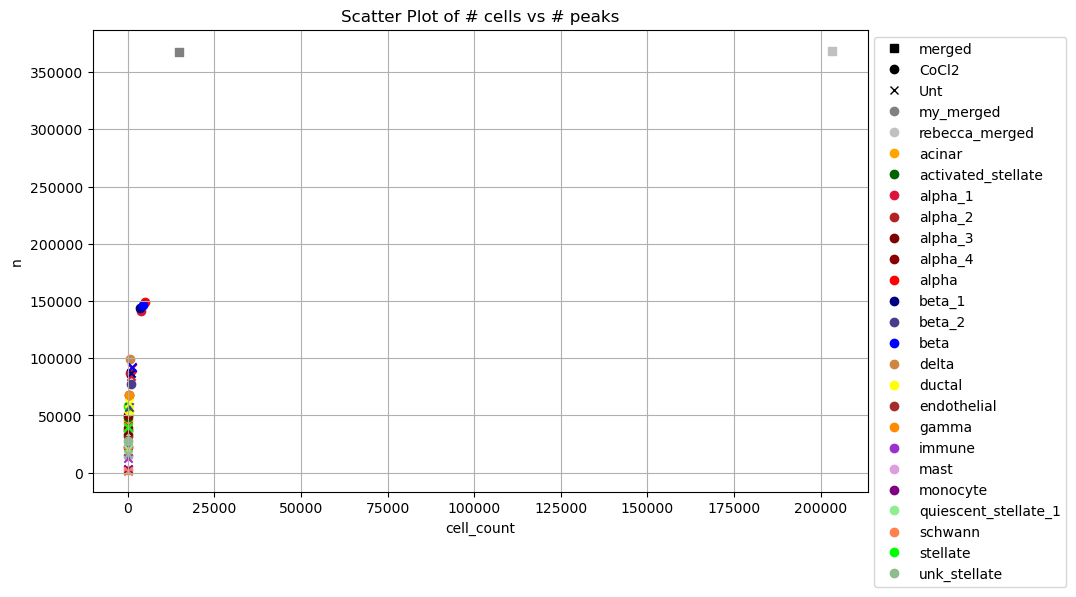

In [58]:
# # Create a boolean mask based on the condition
# mask = metrics_df['Celltype'] != 'rebecca_merged'

# # Apply the mask to the DataFrame
# metrics_df_sub = metrics_df[mask]

# mask = metrics_df_sub['Celltype'] != 'my_merged'

# # Apply the mask to the DataFrame
# metrics_df_sub = metrics_df_sub[mask]



# Define custom marker styles for each treatment
marker_map = treatment_marker_map

# Define a custom color map for cell types
color_map =celltype_color_map

# Extract data from the DataFrame
x =  metrics_df['cell_count']
y = metrics_df['n']
treatments = metrics_df['Treatment'].unique()
celltypes = metrics_df['Celltype'].unique()

# Create a scatter plot for each treatment and cell type combination
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for treatment in treatments:
    for celltype in celltypes:
        mask = (metrics_df['Treatment'] == treatment) & (metrics_df['Celltype'] == celltype)
        marker = marker_map.get(treatment, 'o')
        color = color_map.get(celltype, 'black')
        plt.scatter(x[mask], y[mask], marker=marker, color=color, label=f'{treatment} - {celltype}')

# Customize the plot
plt.title('Scatter Plot of # cells vs # peaks')
plt.xlabel('cell_count')
plt.ylabel('n')
plt.grid(True)

# Create combined legend for treatment and cell type
legend_handles = []
for treatment in treatments:
    marker = plt.Line2D([0], [0], marker=marker_map[treatment], linestyle='None', color='black', label=treatment)
    legend_handles.append(marker)
for celltype in celltypes:
    marker = plt.Line2D([0], [0], marker='o', linestyle='None', color=color_map[celltype], label=celltype)
    legend_handles.append(marker)

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

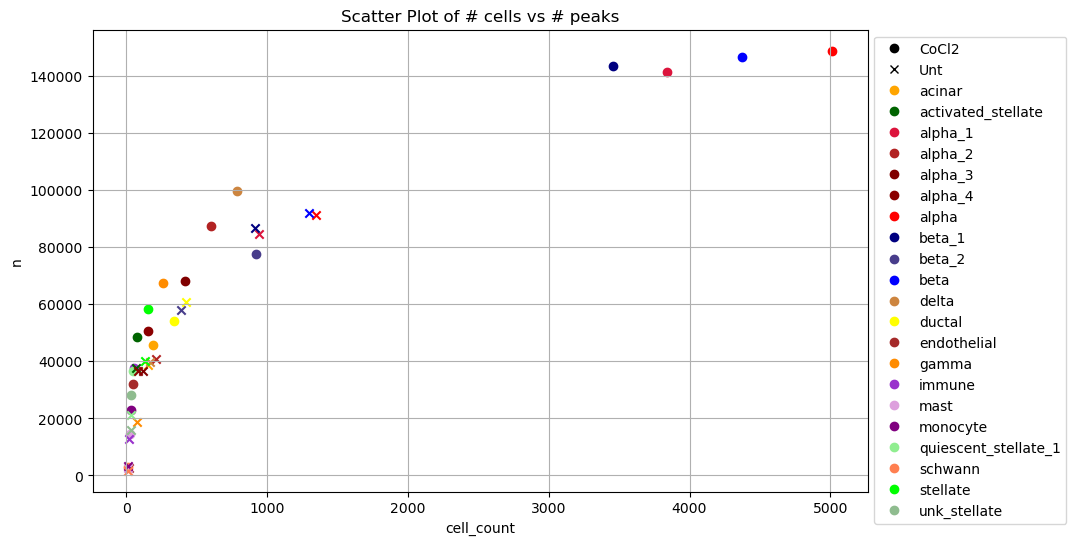

In [59]:
# Create a boolean mask based on the condition
mask = metrics_df['Celltype'] != 'rebecca_merged'

# Apply the mask to the DataFrame
metrics_df_sub = metrics_df[mask]

mask = metrics_df_sub['Celltype'] != 'my_merged'

# Apply the mask to the DataFrame
metrics_df_sub = metrics_df_sub[mask]



# Define custom marker styles for each treatment
marker_map = treatment_marker_map

# Define a custom color map for cell types
color_map =celltype_color_map

# Extract data from the DataFrame
x =  metrics_df_sub['cell_count']
y = metrics_df_sub['n']
treatments = metrics_df_sub['Treatment'].unique()
celltypes = metrics_df_sub['Celltype'].unique()

# Create a scatter plot for each treatment and cell type combination
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for treatment in treatments:
    for celltype in celltypes:
        mask = (metrics_df_sub['Treatment'] == treatment) & (metrics_df_sub['Celltype'] == celltype)
        marker = marker_map.get(treatment, 'o')
        color = color_map.get(celltype, 'black')
        plt.scatter(x[mask], y[mask], marker=marker, color=color, label=f'{treatment} - {celltype}')

# Customize the plot
plt.title('Scatter Plot of # cells vs # peaks')
plt.xlabel('cell_count')
plt.ylabel('n')
plt.grid(True)

# Create combined legend for treatment and cell type
legend_handles = []
for treatment in treatments:
    marker = plt.Line2D([0], [0], marker=marker_map[treatment], linestyle='None', color='black', label=treatment)
    legend_handles.append(marker)
for celltype in celltypes:
    marker = plt.Line2D([0], [0], marker='o', linestyle='None', color=color_map[celltype], label=celltype)
    legend_handles.append(marker)

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [60]:
metrics_df.index


Index(['my_merged', 'rebecca_merged', 'CoCl2__acinar',
       'CoCl2__activated_stellate', 'CoCl2__alpha_1', 'CoCl2__alpha_2',
       'CoCl2__alpha_3', 'CoCl2__alpha_4', 'CoCl2__alpha', 'CoCl2__beta_1',
       'CoCl2__beta_2', 'CoCl2__beta', 'CoCl2__delta', 'CoCl2__ductal',
       'CoCl2__endothelial', 'CoCl2__gamma', 'CoCl2__immune', 'CoCl2__mast',
       'CoCl2__monocyte', 'CoCl2__quiescent_stellate_1', 'CoCl2__schwann',
       'CoCl2__stellate', 'CoCl2__unk_stellate', 'Unt__acinar',
       'Unt__activated_stellate', 'Unt__alpha_1', 'Unt__alpha_2',
       'Unt__alpha_3', 'Unt__alpha_4', 'Unt__alpha', 'Unt__beta_1',
       'Unt__beta_2', 'Unt__beta', 'Unt__delta', 'Unt__ductal',
       'Unt__endothelial', 'Unt__gamma', 'Unt__immune', 'Unt__mast',
       'Unt__monocyte', 'Unt__quiescent_stellate_1', 'Unt__schwann',
       'Unt__stellate', 'Unt__unk_stellate'],
      dtype='object')